# Tips Dataset


`Data Features:`

**total_bill**: a numeric vector, the bill amount (dollars)


**tip**: a numeric vector, the tip amount (dollars)


**sex**: a factor with levels Female Male, gender of the payer of the bill


**smoker**: a factor with levels No Yes, whether the party included smokers


**day**: a factor with levels Friday Saturday Sunday Thursday, day of the week


**time**: a factor with levels Day Night, rough time of day


**size**: a numeric vector, number of people in a table/Party

### Q1] Import the libraries

In [1]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
%matplotlib inline 
sns.set(color_codes=True)

### Q2] Get the Dataset. Check info and shape. Display first 5 rows.

In [2]:
data = pd.read_csv('tips.csv')
data.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


* Numerical: total_bill, tip, size
* Categorical: sex, smoker, day, time

In [4]:
data.shape

(244, 8)

In [5]:
data.describe()

,Unnamed: 0,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


##### Observations:
* No missing values, 244 entries
* Tip min is 1, max is 10, with mean at 2.99. Amount of tips seem to be skewed right (leaning towards the left). Standard deviation is 1.38, indicating values are pretty close to the mean
* Total bill min is 3.07 and ma is 50.81. Mean is 19.79, so it's skewed a little towards the right but mostly balanced. Standard devation is 8.9 indicating somewhat of a spread? not sure

### Q3] Understand the distribution of 'tip' and 'total_bill' using different plots

Hint: Use distplot and boxplot

##### First, starting with exploring tip:

/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


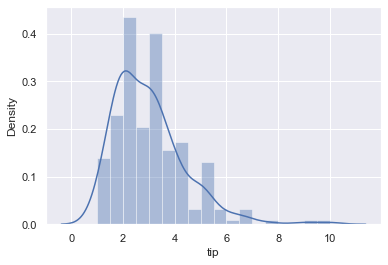

/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


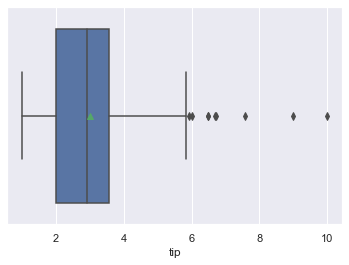

In [6]:
sns.distplot(data['tip'])
plt.show()
sns.boxplot(data['tip'],orient='v',showmeans='true')
plt.show()

#### Observations: 
* Tip is skewed to the right, indicating that the tips lean for a smaller amount of \$.
* Tip has a couple of outliers above \$6.
* Median is very close to the mean of \$3
* 50\% of people paid \~\$3 for the tip.

##### Next, exploring total_bill:

/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


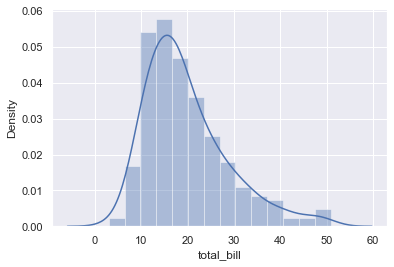

/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vanikahans/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


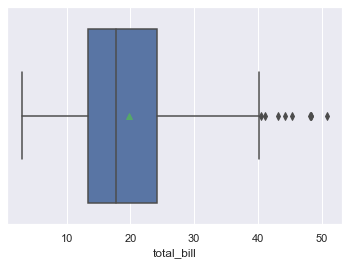

In [7]:
sns.distplot(data['total_bill'])
plt.show()
sns.boxplot(data['total_bill'], orient='v',showmeans=True)
plt.show()

##### Observations:
* Outliers above the \$40 mark 
* Skewed to the right slightly
* Mean is \~\$20, median slightly less. 
* \~50\% of people paid \~\$18 or less for the total meal. 

### Q4] Relationship between 'total_bill' and 'tip'

Implement jointplot, hex jointplot, pairplot and lmplot

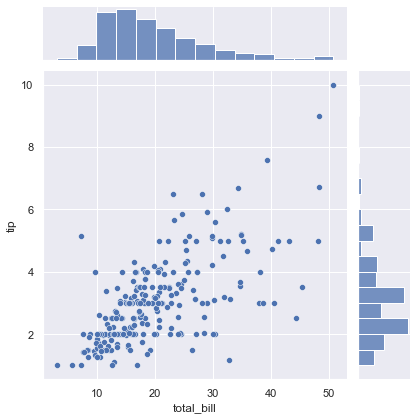

In [8]:
#creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.
sns.jointplot(data = data, x = 'total_bill', y = 'tip');
plt.show()

#### Observations:
* In general, as the total_bill increases, the tip increases
* Data is pretty spread out as the total_bill increases

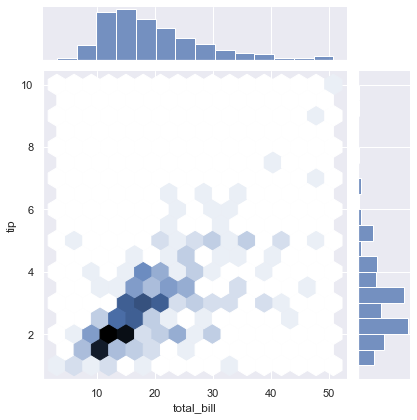

In [9]:
sns.jointplot(data = data, x = 'total_bill', y = 'tip',kind="hex");
plt.show()

Observations
* As confirmed from above, the spread of the amount of tips increases as the total_bill increases-both high and low tips. 
* There is high correlation with the total_bill and tips at the lower end of the total_bill. This may indicate less varied tips provided at the lower end of the total_bill.

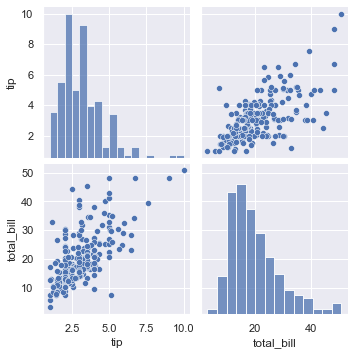

In [10]:
sns.pairplot(data[['tip', 'total_bill']]);

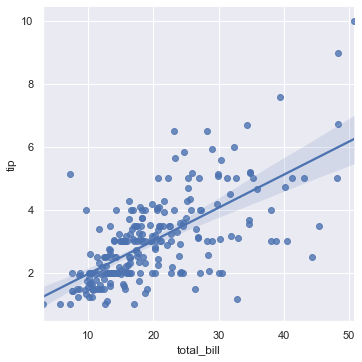

In [11]:
sns.lmplot(y="tip", x="total_bill", data=data);

Observations:
* datapoints seem to be somewhat close to the line as the total_bill remains low
* not many points are within the blue '95% confidence interval' as the total_bill increases

### Q5] Make plots to check distribution of tip with different gender. 

Use striplot and boxplot

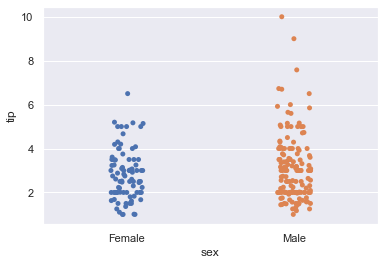

In [12]:
sns.stripplot(data = data, x = 'sex', y='tip', jitter=True);

Observations:
* From the above, it is apparent that looking solely at gender, men seem to tip more.
* The maximum tip amount besides one outlier is \~\$5.25 for the female gender, and \~\$7 for the male gender.

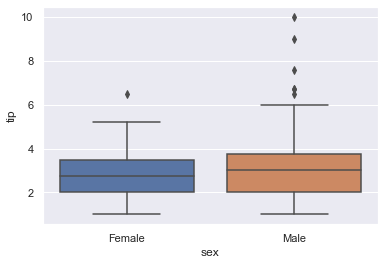

In [13]:
sns.boxplot(data = data, x ='sex', y ='tip');

Observations:
* Adding onto the above observation, the box plots show that the maximum tip for women is \~\$5.25.
* However, the maximum is actually$~$6 with the outliers denoted as above that amount.
* It also seems that 75\% of the tips for men are$~$3.75 or below, and that 75$%$ of tips for women are $~$3.50 or below - very similar. Median values are also about the same
* It is more at the top 25$%$ quartile that the tips are higher for men 
* There are a lot more outliers for the men

### Q6] Draw relationship between 'total_bill', 'tip' and 'sex'

use lmplot

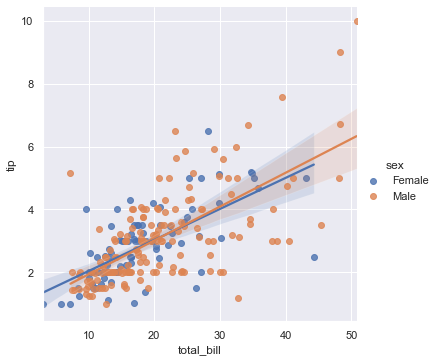

In [14]:
sns.lmplot(y="tip", x="total_bill", hue="sex", data=data);

Observations:
* For the most part, the tips are about the same for men and women on the lower-middle to upper middle range of tips
* There is a slight portion of where the total_bill is low (below ~$10) where there are several datapoints below the line of best fit for women
* On the higher end of total_bill, the tip for men becomes either very high or very low indicating a greater amount of outliers for men for the higher total_bills over women

### Q7] Which day bring in higher bill amount?

use stripplot, swarmplot and boxplot

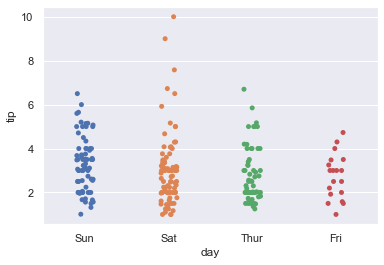

In [15]:
sns.stripplot(data = data, x = 'day', y='tip', jitter=True);

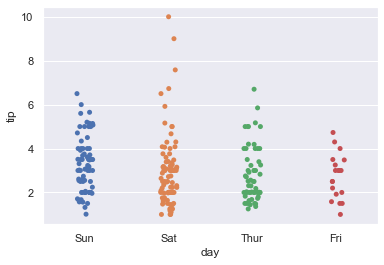

In [16]:
sns.stripplot(data = data, x = 'day', y='tip', jitter=True);

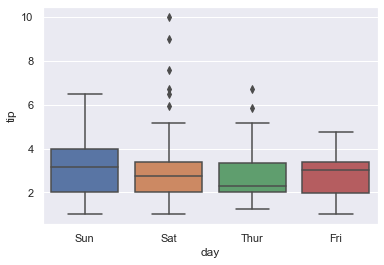

In [17]:
sns.boxplot(data = data, x ='day', y ='tip');

Observations:
* Saturday brings in the higher number of tips
* Friday brings in the lowest number of tips
* Sunday's maximum amount of tips is higher than saturday's maximum, but Saturday has the greatest amount of outliers on the higher end of tips, ranging higher than the maximum amount for sunday
* Regardless of the previous observation, Saturday and Sunday are good days for the tips

### Q8] Find out count of total males and females visiting each day.

use countplot

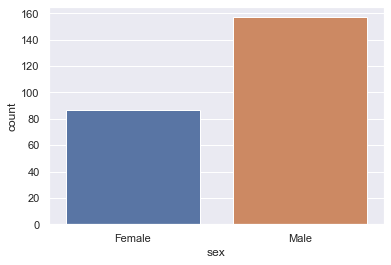

In [18]:
sns.countplot(data = data, x='sex');

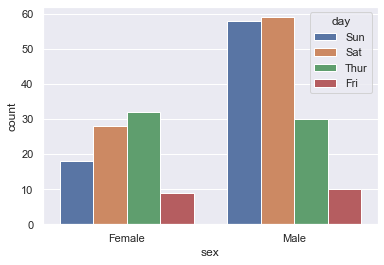

In [19]:
sns.countplot(data = data, x='sex',hue='day');

Observations:
* There is overall a greater amount of men in the dataset paying over women
* The day that has the most women paying is Thursday
* The days that have the most men paying are Saturday and Sunday - about the same amount
* Thursday has abot the same amount of women and men paying
* Friday also has about the same amount of women and men paying

### Q9] At what time of which day does the restaurant get higher amount of bill (consider for male and female separately)

use lmplot

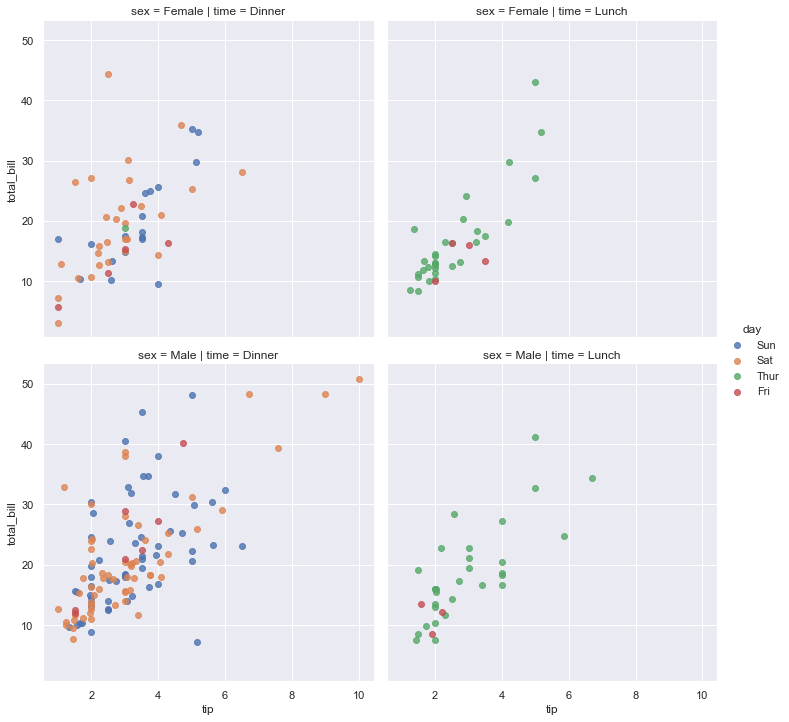

In [20]:
sns.lmplot(y="total_bill", x="tip", data=data,hue='day',fit_reg=False, row='sex',col='time');

Observations:
* Both men and women spend more at dinners on saturdays and sundays
* Both men and women spend more at lunch on thursdays

### Q10] Plot graphs for smoker and non-smoker (try drawing relationship with 'tip').

use stripplot and boxplot

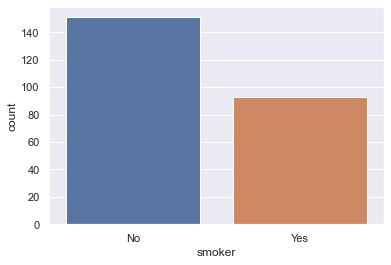

In [21]:
sns.countplot(data = data, x='smoker');

Observations
* There are more non-smokers than smokers in the dataset

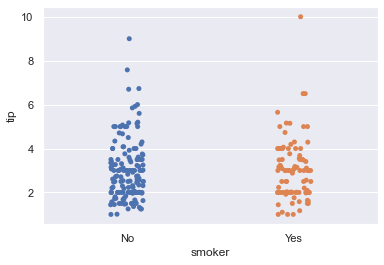

In [22]:
sns.stripplot(data = data, x = 'smoker', y='tip', jitter=True);
plt.show()

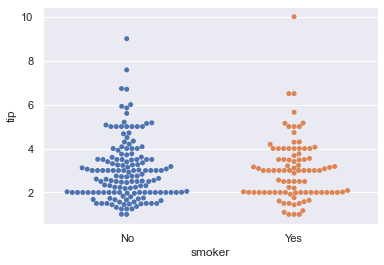

In [23]:
sns.swarmplot(x='smoker',y='tip',data=data)
plt.show()

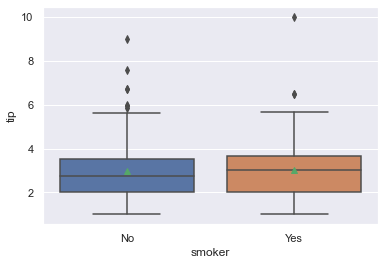

In [24]:
sns.boxplot(data=data,x='smoker', y='tip', showmeans=True)
plt.show()

Observations:
* box plots look quite similar for both, except that there are slightly more outliers for the non-soker case
* indicates that there might not be a relationship between just smoker and tips

### Q11] Draw relationship between 'total_bill', 'tip' and 'smokers'

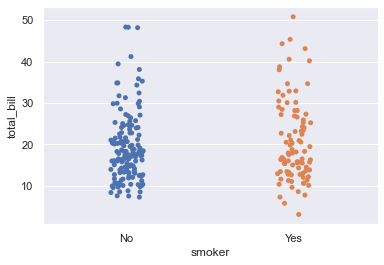

In [25]:
sns.stripplot(data = data, x = 'smoker', y='total_bill', jitter=True);
plt.show()

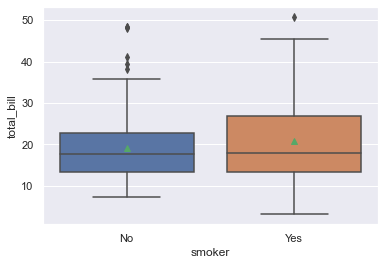

In [26]:
sns.boxplot(data=data,x='smoker', y='total_bill', showmeans=True)
plt.show()

Observations:
* There is a higher total_bill with smoker in the 3rd quartile.
* Also, there is a slightly low total_bill with smokers as well (two datapoints)

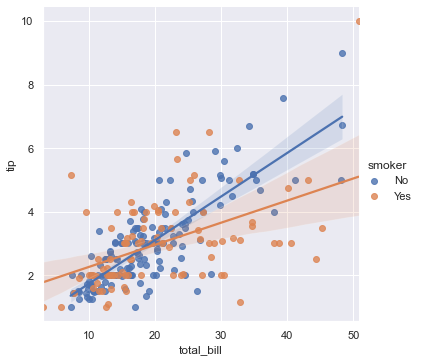

In [27]:
sns.lmplot(y="tip", x="total_bill", data=data,hue='smoker');

Observations
* When the total_bill is higher, the non-smoker tends to tip higher